In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

sns.set(style='white', context='notebook', palette='deep')

In [4]:
# データ読み込み
df_train = pd.read_csv(R"C:\Users\tgyhu\OneDrive\デスクトップ\python\train.csv")
df_test = pd.read_csv(R"C:\Users\tgyhu\OneDrive\デスクトップ\python\test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test_id = df_test["PassengerId"]
df_train = df_train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]
df_test = df_test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [8]:
age_ave = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(age_ave)
df_test['Age'] = df_test['Age'].fillna(age_ave)

# Fareの欠損値を平均値で埋める
fare_ave = df_train['Fare'].mean()
df_train['Fare'] = df_train['Fare'].fillna(fare_ave)
df_test['Fare'] = df_test['Fare'].fillna(fare_ave)

# Embarkedの欠損値を最頻値"S"で埋める
df_train['Embarked'] = df_train['Embarked'].fillna("S")
df_test['Embarked'] = df_test['Embarked'].fillna("S")

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df_train["FamilyNum"] = df_train["SibSp"] + df_train["Parch"]
df_train["hasFamily"] = df_train["FamilyNum"].apply(lambda x : 1 if x >= 1 else 0)
df_train = df_train.drop(labels = ["SibSp"], axis = 1)
df_train = df_train.drop(labels = ["Parch"], axis = 1)

df_test["FamilyNum"] = df_test["SibSp"] + df_test["Parch"]
df_test["hasFamily"] = df_test["FamilyNum"].apply(lambda x : 1 if x >= 1 else 0)
df_test = df_test.drop(labels = ["SibSp"], axis = 1)
df_test = df_test.drop(labels = ["Parch"], axis = 1)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   Fare       418 non-null    float64
 4   Embarked   418 non-null    object 
 5   FamilyNum  418 non-null    int64  
 6   hasFamily  418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [12]:
# カテゴリー変数をダミー変数にエンコード
df_train = pd.get_dummies(df_train, columns=["Sex", "Pclass", "Embarked"])
df_test = pd.get_dummies(df_test, columns=["Sex", "Pclass", "Embarked"])

# エンコード後のデータ構造を確認するため表示
df_train.head()

,Age,Fare,Survived,FamilyNum,hasFamily,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,False,True,False,False,True,False,False,True
1,38.0,71.2833,1,1,1,True,False,True,False,False,True,False,False
2,26.0,7.9250,1,0,0,True,False,False,False,True,False,False,True
3,35.0,53.1000,1,1,1,True,False,True,False,False,False,False,True
4,35.0,8.0500,0,0,0,False,True,False,False,True,False,False,True


In [13]:
# 特徴量とラベルに分割
Y_train = df_train["Survived"]
X_train = df_train.drop(labels = ["Survived"], axis = 1)
X_test = df_test

del df_train
del df_test

In [14]:
# 学習用セットと検証用セットに分割
random_seed = 1
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.5, random_state = random_seed)

In [15]:
# 学習に関するパラメータ設定
params = {
    "n_estimators" : [2, 5, 10, 15, 20, 30, 50, 75, 100, 200, 500, 1000],
    "criterion" : ["gini"],
    "min_samples_split" : [2, 3, 5, 10, 15, 20, 30],
    "max_depth" : [2, 3, 5, 10, 15, 20, 30],
    "random_state" : [1],
    "verbose" : [False],
}

# モデル構築
model = GridSearchCV(RandomForestClassifier(), params, cv = 3)
model = model.fit(X_train, Y_train)
model = model.best_estimator_

# 検証用セットを用いて評価
model.score(X_val, Y_val)

0.8026905829596412

In [16]:
# 予測
results = model.predict(X_test)
results = pd.Series(results, name = "Survived")

In [17]:
# 提出データを作成
submission = pd.concat([df_test_id, results], axis = 1)
submission.to_csv("random_forest_submission.csv", index = False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


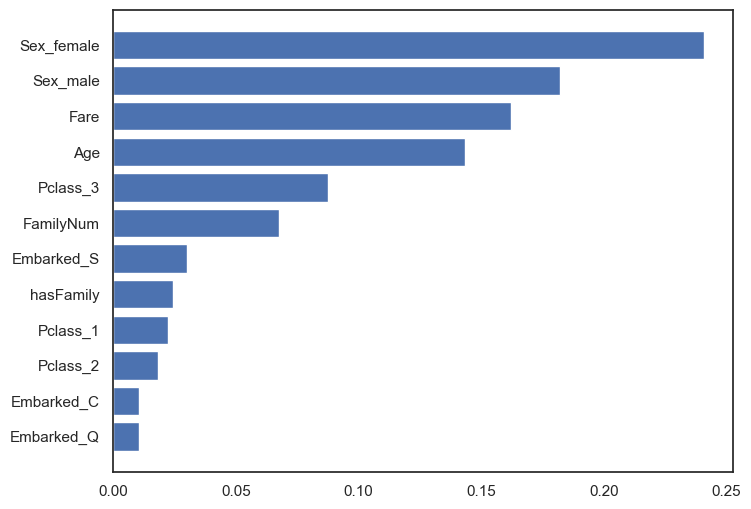

In [17]:
features = X_train.columns
importance = model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize = (8,6))
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()